# Graph extraction
## Notebook overview
- Explain how to extract a graph from a binarized image 

## Boilerplate code

In [1]:
from StructuralGT.networks import Network
import matplotlib.pyplot as plt

Nanowires = Network('Nanowires', binarized_dir='GaussianBlur')

Once an image has been binarized, the *skeleton*, which is a 1-pixel wide representation of the network, is computed. This is achieved by calling the `img_to_skel()` method. This saves a `.gsd`, which can be openend with OVITO. It also sets the `skeleton` attribute, which can be examined to predict the quality of our subsequent graph extraction:

Ran img_to_skel() in  0.6967298984527588 for skeleton with  132163 voxels


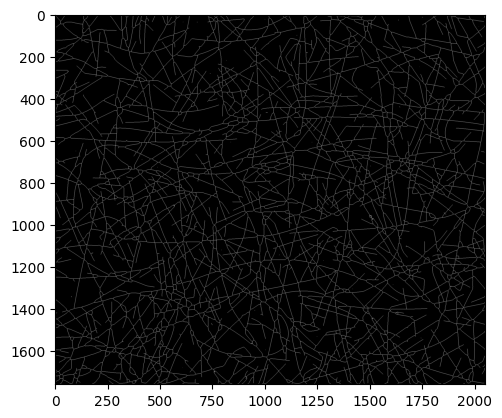

In [2]:
Nanowires.img_to_skel()
plt.imshow(Nanowires.skeleton, cmap='gray')

There are several options that may be passed to `img_to_skel()`. They are too numerous to cover here but can be found at the API documentation. To extract the graph from the skeleton, the `set_graph()` method should be called. Again, optional parameters for this method are covered in the API. 

In [3]:
Nanowires.set_graph()

Before removing smaller components, graph has 3525  nodes
After removing smaller components, graph has 3459  nodes


implicit data copy when writing chunk: log/Edge_lens
implicit data copy when writing chunk: log/Node_lens


Calling `set_graph` does 2 things: its sets the `graph` attribute, and stores features of the graph in a `.json` and `.gsd` file, from which the `Network` can later be loaded. The `graph` object is an `igraph.Graph` object, from the [igraph](https://python.igraph.org/en/stable/) library. *igraph* is a library for carrying out computations on graphs. Access to an `igraph.Graph` object hence affords the user all of the capabilities of this library. For example, consulting the *igraph* [documentation](https://python.igraph.org/en/stable/api/igraph.Graph.html) on the `igraph.Graph` object, we may examine the adjacency matrix, and confirm it is a square matrix with length equal to the number of nodes:

In [4]:
A = Nanowires.graph.get_adjacency()
print(A.shape)

(3459, 3459)


The quality of the final graph can be inspected with the `graph_plot()` method:

<Axes: >

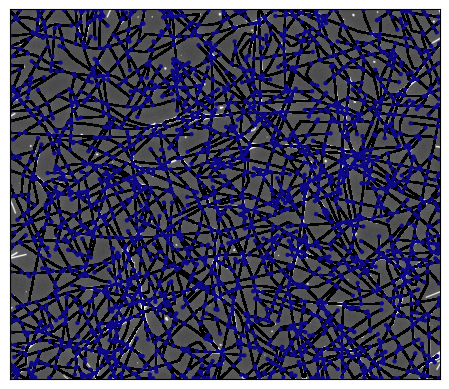

In [5]:
Nanowires.graph_plot()

This confirms the graph is a reasonable representation of the true nanowire structure. To go beyond what is offered by the `igraph.Graph` object, *StructuralGT*'s main offering are analyses that can be carried out with the `Compute` modules, which are the subject of the next tutorial.